# **Projeto Ponta a Ponta: Prevendo a qualidade do ar de Pequim**
---

O conjunto de [dados](https://code.datasciencedojo.com/datasciencedojo/datasets/blob/master/Beijing%20PM2.5/README.md) os dados PM2.5 da Embaixada dos EUA em Pequim. Também há dados meteorológicos do Aeroporto Internacional de Pequim também estão incluídos.

## 1. Coletando dados

In [1]:
!pip install -U scikit-learn

import matplotlib.pyplot as plt

plt.style.use('seaborn')

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.1)


In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/MSR1805200/Portifolio/main/projetos_pessoais/air_quality/air_quality.csv')

df.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df = df.drop(['No'],axis = 1) #dropando a coluna No, ela não é útil

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB


Temos colunas diversas e apenas uma do tipo Object.

Vamos obervar o significado de cada coluna:

**year** : ano dos dados

**month** : mês dos dados

**day** : dia dos dados 

**hour** : hora dos dados

**pm2.5** :  concentração de PM2.5 (ug/m^3)

**DEWP** : Dew Point(Ponto de Orvalho)   (â„ƒ)

**TEMP** : Temperatura(â„ƒ)

**PRES** : Pressão (hPa)

**cbwd** : Commbined  wind direction (Direção do vento combinada)

**Iws** :  Cumulated   wind speed (Velocidade do vento acumulada)  (m/s)

**Is** : Cumulated   hours of snow (horas acumuladas de neve)

**Ir** : Cumulated   hours of rain (horas acumuladas de chuva)




A nossa variável alvo seria a coluna pm2.5. O pm2.5 são partículas finas de poluição que causam doenças nas pessoas. Leia a [notícia](https://revistagalileu.globo.com/Ciencia/noticia/2018/11/particulas-finas-de-poluicao-sao-novas-inimigas-da-nossa-saude.html).

## 2. Divisão dos dados

Para evitar qualquer viés ou alteração indevida nos dados, é importante realizar a divisão de treino e teste desde já.

In [5]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df,random_state = 42,test_size = 0.3,shuffle = True)

## 3. Pré-processando os dados

Vamos observar se há algum valor nulo nas colunas.

In [6]:
train_set.isnull().sum()

year        0
month       0
day         0
hour        0
pm2.5    1490
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

  Observe que há valores nulos na coluna target. Isso pode ser resolvido utilizando a técnica de imputação de dados pela mediana. Precisamos imputar todas as colunas, pois ainda não sabemos se o conjunto de teste tem valores nulos na coluna target ou em qualquer outra. Além disso precisamos dividir as colunas em categóricas e númericas. As categóricas ficarão com a imputação pelo mais frequente e as numéricas ficarão com a imputação pela mediana.

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer([
      ('cat', SimpleImputer(strategy='most_frequent'),['cbwd']),
      ('num',SimpleImputer(strategy='median'),['year','month','day','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir'])
])

train_set_complete = ct.fit_transform(train_set)


train_set_complete

array([['SE', 2013.0, 9.0, ..., 33.54, 0.0, 0.0],
       ['SE', 2012.0, 8.0, ..., 26.82, 0.0, 0.0],
       ['NW', 2014.0, 8.0, ..., 3.58, 0.0, 0.0],
       ...,
       ['SE', 2014.0, 5.0, ..., 66.17, 0.0, 0.0],
       ['SE', 2010.0, 2.0, ..., 8.94, 0.0, 0.0],
       ['NW', 2011.0, 10.0, ..., 0.89, 0.0, 0.0]], dtype=object)

In [8]:
train_set = pd.DataFrame(data = train_set_complete, columns=['cbwd','year','month','day','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir'])

In [9]:
train_set[['year','month','day','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']] = train_set[['year','month','day','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']].apply(pd.to_numeric)

## 4. Análise Exploratória

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e5a495be0>,
      dtype=object)

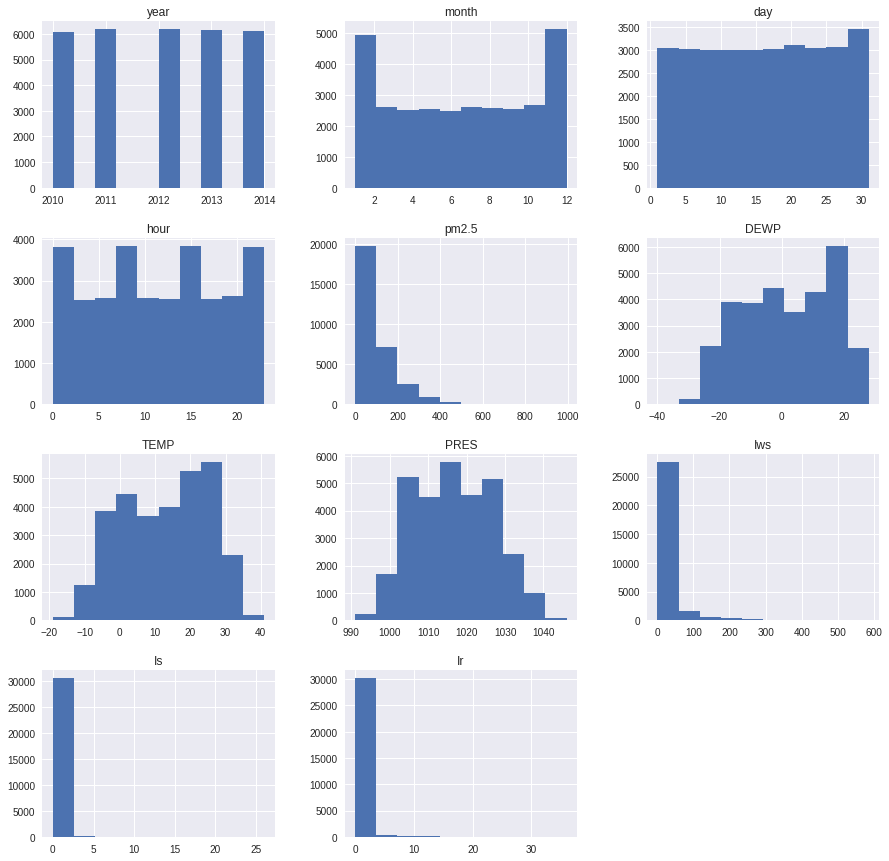

In [10]:
train_set.hist(figsize = (15,15))

Podemos observar que alguns dados como a coluna alvo possui uma distribuição assimétrica. Existe também colunas que tentam se aproximar de uma distribuição normal, como é o caso da coluna PRES.

Agora vamos observar a correlação entre as colunas.

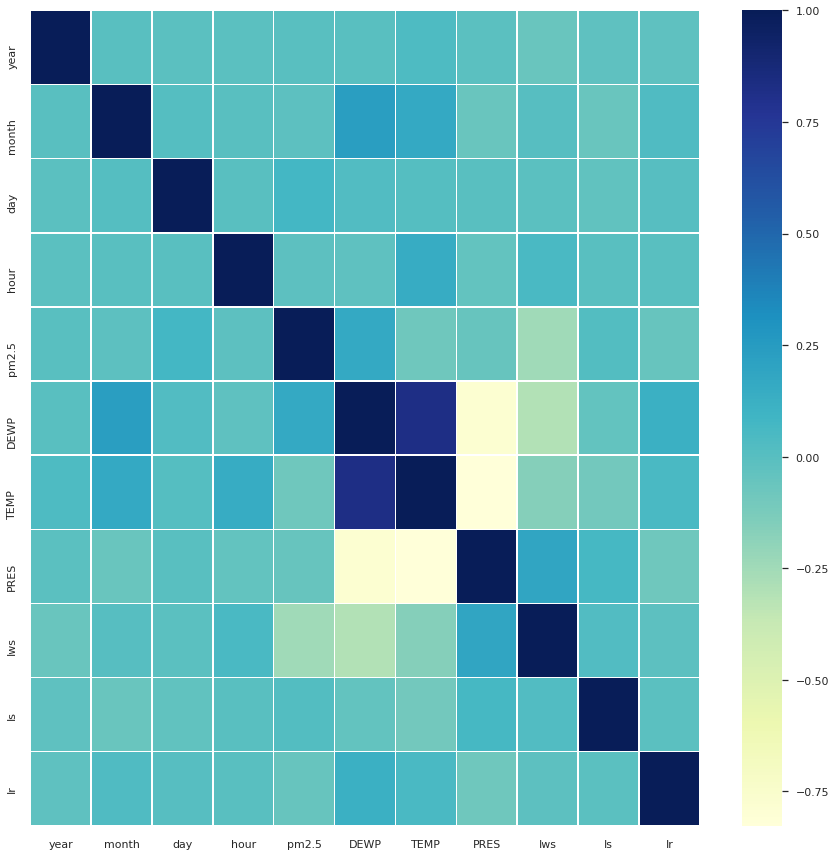

In [11]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(train_set.corr(),linewidths=.5,cmap="YlGnBu")

Ao que parece, as colunas não possuem uma correlação diretamente proporcional muito forte, mas se você observar a coluna PRES com a coluna TEMP por exemplo, verá que a correlação inversamente proporcional entre elas é bem forte.

Vamos observar a correlação das colunas com a coluna alvo.

In [12]:
train_set.corr()['pm2.5'].sort_values(ascending =False)

pm2.5    1.000000
DEWP     0.171492
day      0.077804
Is       0.020578
year    -0.004941
hour    -0.019302
month   -0.019977
Ir      -0.049057
PRES    -0.051166
TEMP    -0.084012
Iws     -0.244935
Name: pm2.5, dtype: float64

Ao que parece, as colunas não possuem uma correlação muito forte com a coluna alvo. Vamos observar de forma mais detalhada com gráficos.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

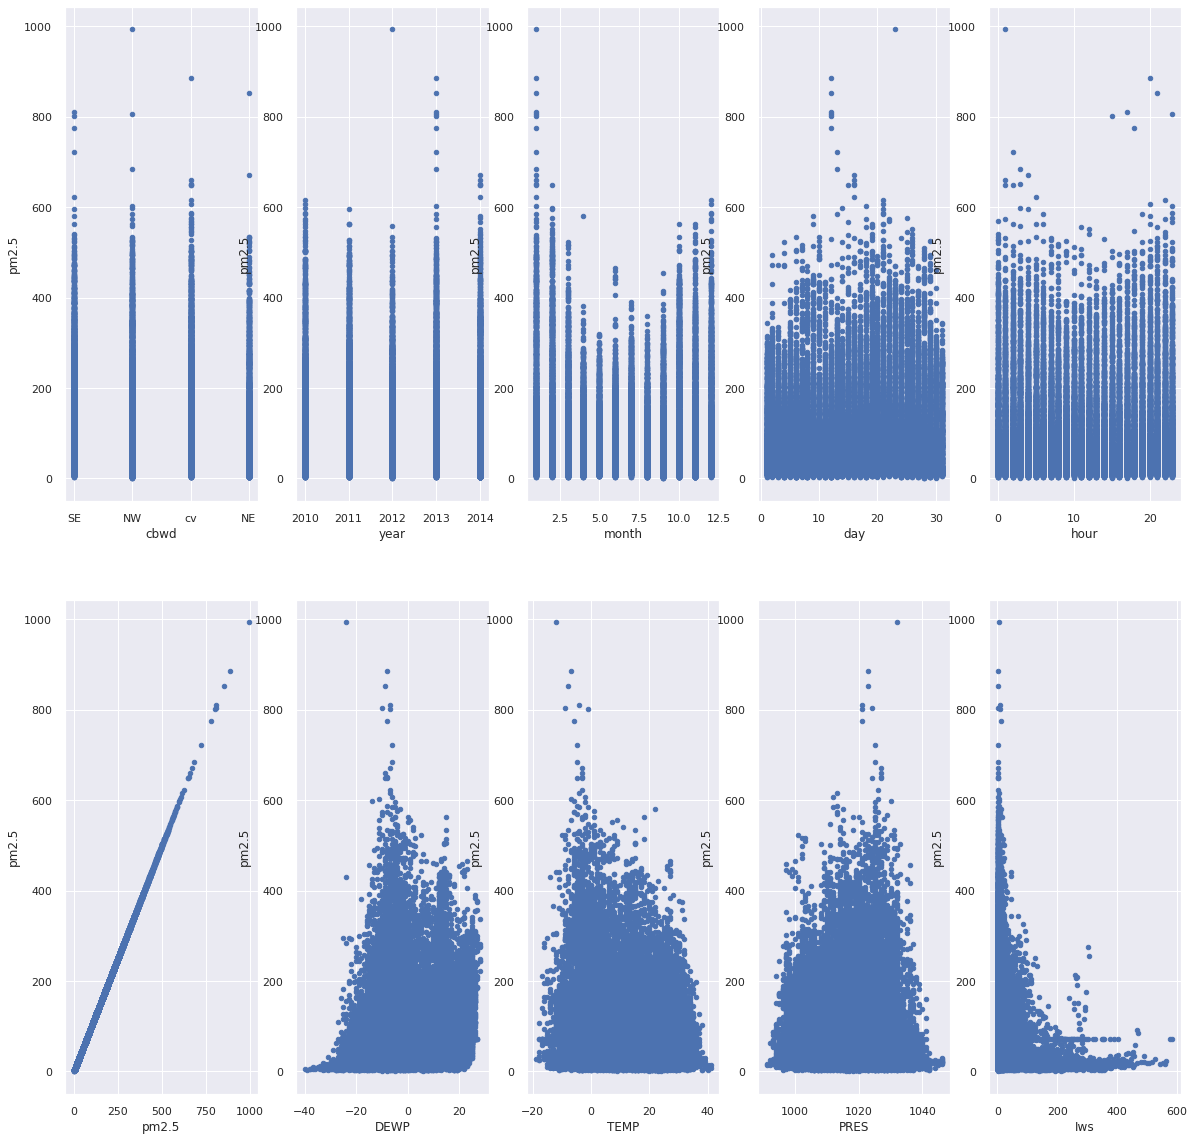

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=5)

size = (20,20)

colunas = train_set.columns

cont = 0
for i in range(2):
  for j in range(5):
    train_set.plot(kind = 'scatter', x = colunas[cont], y = 'pm2.5', figsize = size,ax = axes[i,j])
    cont = cont+1

Há algumas coluna que tentam seguir uma linha como é o caso do DEWP e Iws.

## 5. Modelagem e Treino

Primeiramente vamos transformar a coluna cbwd em numérica. Como se trata de um atributo categórico nominal, irei utilizar a técnica One Hot Encoding.

In [14]:
train_set = pd.get_dummies(train_set, columns = ['cbwd'])

Agora vamos escalonar as colunas para evitar viéses.

In [15]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x_train = train_set.drop(['pm2.5'],axis = 1).copy()
y_train = train_set['pm2.5'].copy()


x_tr = scale.fit_transform(x_train)


Agora vamos realizar a escolha dos algoritmos preditivos.

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict

def plot_errors(y,pred):
  print('MSE: ',mean_squared_error(y,pred))
  print('RMSE: ',mean_squared_error(y,pred,squared=False))
  print('MAE: ', mean_absolute_error(y,pred))

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

pred = cross_val_predict(rfr,x_tr,y_train,cv =10)

plot_errors(y_train,pred)

MSE:  1449.5872224181771
RMSE:  38.073445108345226
MAE:  23.92025916025558


In [18]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

pred = cross_val_predict(knr,x_tr,y_train,cv =10)

plot_errors(y_train,pred)

MSE:  3324.952197157387
RMSE:  57.66239846865015
MAE:  36.74578171860738


In [19]:
from sklearn.linear_model import LinearRegression

lr =  LinearRegression()

pred = cross_val_predict(lr,x_tr,y_train,cv =10)

plot_errors(y_train,pred)

MSE:  5930.156514424219
RMSE:  77.00750946774099
MAE:  55.562561795313556


In [20]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()

pred = cross_val_predict(sgdr,x_tr,y_train,cv =10)

plot_errors(y_train,pred)

MSE:  5944.954641223261
RMSE:  77.10353196334952
MAE:  55.662275392463634


In [21]:
from sklearn.svm import SVR

svr = SVR()

pred = cross_val_predict(svr,x_tr,y_train,cv =10)

plot_errors(y_train,pred)

MSE:  6400.308026203168
RMSE:  80.00192514060626
MAE:  49.74567425984553


In [22]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR()

pred = cross_val_predict(linear_svr,x_tr,y_train,cv =10)

plot_errors(y_train,pred)

MSE:  6652.682972040494
RMSE:  81.56398084964033
MAE:  52.33933482203249


O algoritmo preditivo com menor erro foi o Random Forest, logo ele será escolhido para o processo de aprimoramento e teste.

## 6. Aprimoramento e Teste

Vamos aprimorar o Random Forest com o grid search.

In [24]:
from sklearn.model_selection import GridSearchCV

param = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]


grid = GridSearchCV(rfr,param,cv= 10,scoring='neg_mean_squared_error')

grid.fit(x_tr,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [26]:
modelo = grid.best_estimator_

Agora vamos realizar o pré-processamento feito no treino para o conjunto de teste.

In [27]:
#imputando valores ausentes e recriando o dataframe

test_set = ct.transform(test_set)

test_set_complete = pd.DataFrame(data = test_set, columns=['cbwd','year','month','day','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir'])

test_set_complete[['year','month','day','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']] = test_set_complete[['year','month','day','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']].apply(pd.to_numeric)

In [28]:
#one hot enconding para o teste
test_set_complete = pd.get_dummies(test_set_complete, columns = ['cbwd'])

In [31]:

x_test = test_set_complete.drop(['pm2.5'],axis = 1).copy()
y_test = test_set_complete['pm2.5'].copy()

x_test_tr = scale.transform(x_test)

In [32]:
modelo.fit(x_tr,y_train)


test_pred = modelo.predict(x_test_tr)

In [33]:
plot_errors(y_test,test_pred)

MSE:  1279.2980587770003
RMSE:  35.76727636788969
MAE:  20.89815028901734


O modelo obteve um erro menor que o seu treino, logo ele está pronto para realizar o deploy.